In [189]:
# !pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 8.0 MB/s 


In [190]:
### load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

# scikit-learn
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Explainable AI
import shap

# 한글 폰트 설정
# plt.rcParams['font.family'] = 'NanumGothic'

In [177]:
### load example data
data = pd.read_csv('auto-mpg.csv')

### remove not need column
data_use = data[data.columns.difference(['name'])]
data_use = data_use.dropna(axis=0)

### change Dtype
#data_use = data_use.astype({'horsepower':'int'})

In [178]:
data_use

,acceleration,cylinders,displacement,horsepower,modelyear,mpg,origin,weight
0,12.0,8,307.0,130.0,70,18.0,1,3504
1,11.5,8,350.0,165.0,70,15.0,1,3693
2,11.0,8,318.0,150.0,70,18.0,1,3436
3,12.0,8,304.0,150.0,70,16.0,1,3433
4,10.5,8,302.0,140.0,70,17.0,1,3449
...,...,...,...,...,...,...,...,...
393,15.6,4,140.0,86.0,82,27.0,1,2790
394,24.6,4,97.0,52.0,82,44.0,2,2130
395,11.6,4,135.0,84.0,82,32.0,1,2295
396,18.6,4,120.0,79.0,82,28.0,1,2625


In [179]:
### train test select
X = data_use[data_use.columns.difference(['mpg'])]
y = data_use[["mpg"]]

In [180]:
# 랜덤포레스트 득점모델 학습
etr = ExtraTreesRegressor()

In [181]:
# fitting
etr.fit(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ExtraTreesRegressor()

In [185]:
# train rmse
X_predict = etr.predict(X)
print("RMSE':{}".format(math.sqrt(mean_squared_error(X_predict, y))))

RMSE':0.004141009440181629


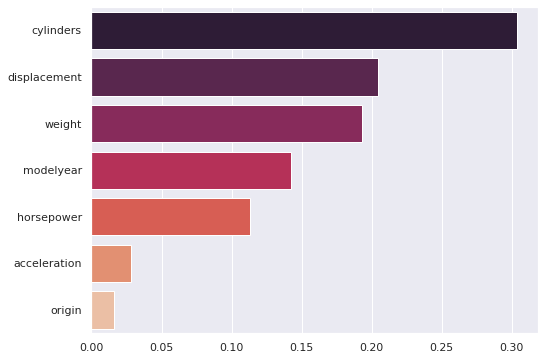

In [187]:
%matplotlib inline
 
ftr_importances_values = etr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index, palette = 'rocket')
plt.show()


## SHAP
- one of Explainable AI method

In [192]:
# Fits the explainer
explainer = shap.Explainer(etr.predict, X)

# Calculates the SHAP values - It takes some time
shap_values = explainer(X)

Exact explainer: 393it [00:50,  6.83it/s]


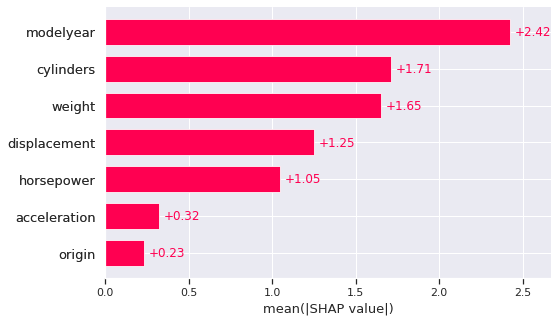

In [196]:
shap.plots.bar(shap_values)

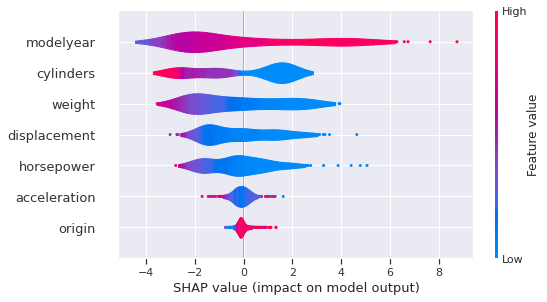

In [199]:
shap.summary_plot(shap_values, plot_type='violin')

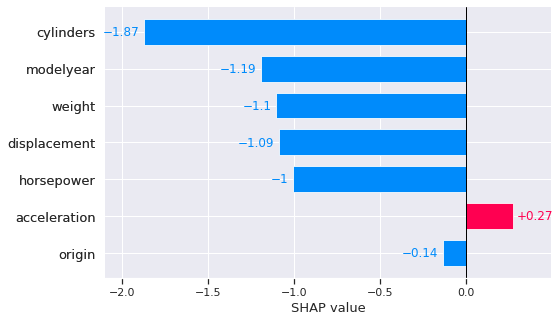

In [200]:
shap.plots.bar(shap_values[0])

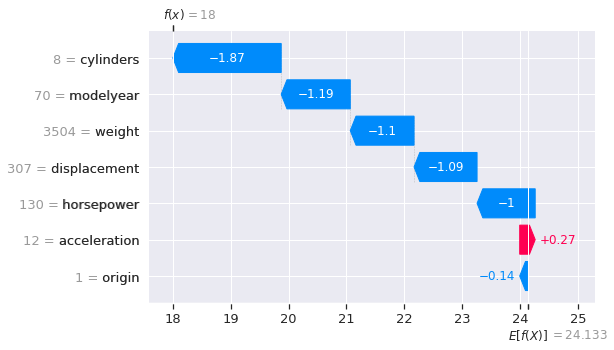

In [201]:
shap.plots.waterfall(shap_values[0])